# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv", encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [3]:
online_rt.Country.nunique()

38

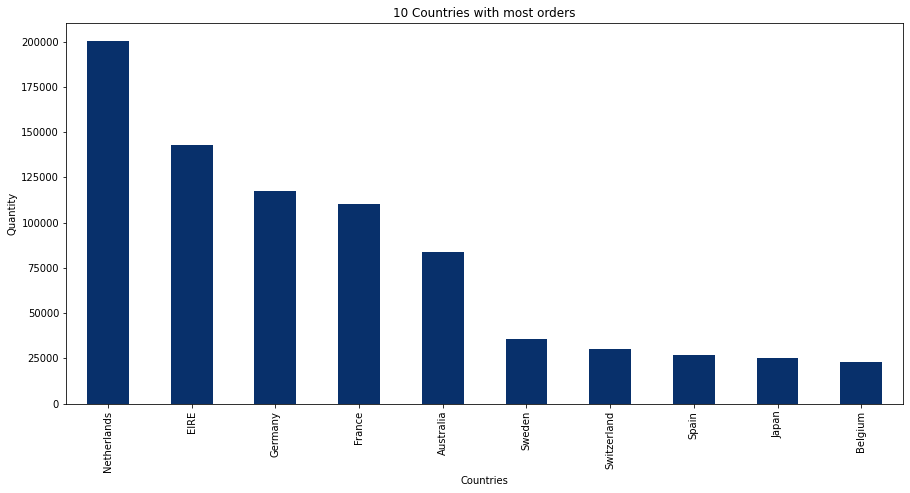

In [4]:
Countries = online_rt.groupby(['Country']).sum()

Countries = Countries.sort_values(by = 'Quantity', ascending = False)[1:11]

Countries['Quantity'].plot.bar(figsize = (15, 7), cmap ='Blues_r')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### Step 5.  Exclude negative Quantity entries

In [5]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [10]:
Cust_ID = online_rt.groupby(['CustomerID', 'Country']).sum()

# creates the FaceGrid
g = sns.FacetGrid(Cust_ID, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

KeyError: ignored

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [14]:
Cust_ID = online_rt.groupby(['CustomerID', 'Country']).sum()
Cust_ID

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30
...,...,...,...
18280.0,United Kingdom,45,47.65
18281.0,United Kingdom,54,39.36
18282.0,United Kingdom,103,62.39


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [15]:
online_rt.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [23]:
online_rt[online_rt.CustomerID == 12346.0].sort_values(by='UnitPrice', ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [24]:
online_rt[online_rt.CustomerID==12347.0].sort_values(by ='UnitPrice' , ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [30]:
sales_vol = online_rt.groupby(['Country'])['Quantity'].sum().sort_values(ascending = False)

top_4_coun = sales_vol.index[0:4]

top_3_coun_excl_UK = sales_vol.index[1:4]
top_3_coun_excl_UK

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [31]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [47]:
group = online_rt[online_rt.Country.isin(top_3_coun_excl_UK)].groupby(['CustomerID', 'Country'])

spend_per_unit = group['Quantity', 'Revenue'].agg('sum')

spend_per_unit['AvgPrice'] = spend_per_unit['Revenue']/spend_per_unit['Quantity']

spend_per_unit['Country'] = spend_per_unit.index.get_level_values(1)
spend_per_unit.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

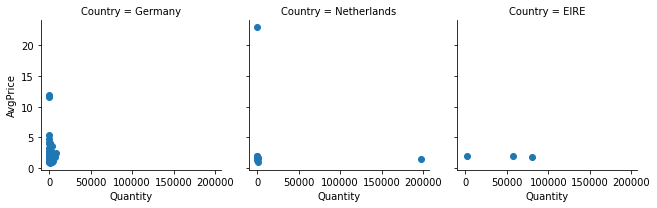

In [48]:
g = sns.FacetGrid(spend_per_unit, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


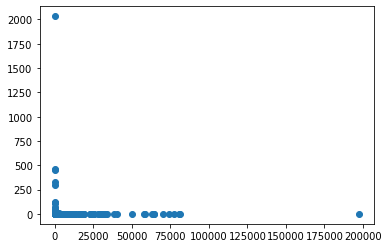

In [54]:
group = online_rt.groupby('CustomerID')

spend_per_unit = group['Quantity', 'Revenue'].agg('sum')

spend_per_unit['AvgPrice'] = spend_per_unit['Revenue']/spend_per_unit['Quantity']

plt.scatter(spend_per_unit['Quantity'], spend_per_unit['AvgPrice'])

##### Step 7.4.2 Zoom in so we can see that curve more clearly

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

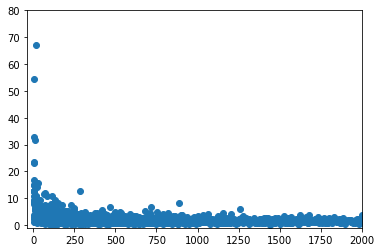

In [55]:
group = online_rt.groupby('CustomerID')

spend_per_unit = group['Quantity', 'Revenue'].agg('sum')

spend_per_unit['AvgPrice'] = spend_per_unit['Revenue']/spend_per_unit['Quantity']

plt.scatter(spend_per_unit['Quantity'], spend_per_unit['AvgPrice'])


# By changing ticksize
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [61]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.3 Plot.

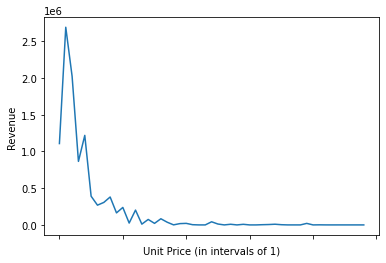

In [62]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

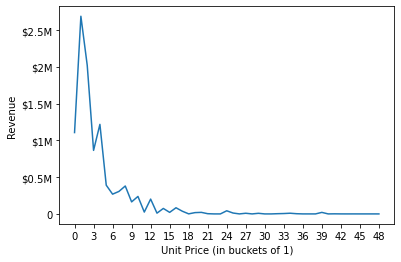

In [63]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()